---


In [ ]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt

import pandas as pd
from tqdm.auto import tqdm

import nltk

nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")


ROOT_PATH = Path("..").resolve()
SCRIPTS_PATH = ROOT_PATH / "scripts"
DATA_PATH = ROOT_PATH / "data"

sys.path.append(str(SCRIPTS_PATH))

from preprocessing import (
    preprocess_simple,
    preprocess_advanced,
    preprocess_bert,
    drop_short_texts,
)

tqdm.pandas(desc="Preprocessing")

pd.set_option("display.max_colwidth", 200)

CSV_FILE = DATA_PATH / "training.1600000.processed.noemoticon.csv"
CSV_FILE

c:\Users\Gui\Desktop\AAA_doc\Openclassroom school\Python project\proj_proj\proj7\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gui\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Gui\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gui\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gui\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Gui\

WindowsPath('C:/Users/Gui/Desktop/AAA_doc/Openclassroom school/Python project/proj_proj/proj7/data/training.1600000.processed.noemoticon.csv')

In [ ]:
col_names = ["target", "ids", "date", "flag", "user", "text"]

df = pd.read_csv(CSV_FILE, encoding="latin-1", header=None, names=col_names)

df.shape, df.head()

((1600000, 6),
    target         ids                          date      flag  \
 0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
 1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
 2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
 3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
 4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
 
               user  \
 0  _TheSpecialOne_   
 1    scotthamilton   
 2         mattycus   
 3          ElleCTF   
 4           Karoli   
 
                                                                                                                   text  
 0  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
 1      is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!  
 2                            @Kenichan I dived many times for the ball. Managed 

In [ ]:
df["target"].value_counts(), df["target"].value_counts(normalize=True) * 100

(target
 0    800000
 4    800000
 Name: count, dtype: int64,
 target
 0    50.0
 4    50.0
 Name: proportion, dtype: float64)

In [ ]:
df["label"] = (df["target"] == 4).astype(int)
df[["target", "label"]].head()

,target,label
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


---


In [ ]:
df_sample = df.sample(5, random_state=0)[["text"]].copy()
df_sample["text_clean"] = df_sample["text"].apply(preprocess_simple)
df_sample

,text,text_clean
557138,wants to compete! i want hard competition! i want to rally. i want to feel the power coming out of the engine! i want to compete,want compete want hard competition want rally want feel power coming engine want compete
349381,It seems we are stuck on the ground in Amarillo. They have put a ground stop for all flights leaving for Denver. Said updates in an hour,seems stuck ground amarillo put ground stop flight leaving denver said update hour
182051,where the f are my pinking shears? rarararrrarararr...babyproofing while cutting stuff makes me stick shears random places &amp; forget them,pinking shear rarararrrarararr babyproofing cutting stuff make stick shear random place amp forget
571236,0ff t0 tHE MEEtiN.. i HAtE WhEN PPl V0lUNtEER MY fREE tiME..gRRR!,0ff meetin hate ppl v0lunteer free time grrr
1339637,@ reply me pls,reply pls


In [ ]:
df_sample = df.sample(5, random_state=0)[["text"]].copy()
df_sample["text_clean"] = df_sample["text"].apply(preprocess_advanced)
df_sample

,text,text_clean
557138,wants to compete! i want hard competition! i want to rally. i want to feel the power coming out of the engine! i want to compete,wants to compete want hard competition want to rally want to feel the power coming out of the engine want to compete
349381,It seems we are stuck on the ground in Amarillo. They have put a ground stop for all flights leaving for Denver. Said updates in an hour,it seems we are stuck on the ground in amarillo they have put ground stop for all flights leaving for denver said updates in an hour
182051,where the f are my pinking shears? rarararrrarararr...babyproofing while cutting stuff makes me stick shears random places &amp; forget them,where the are my pinking shears rarararrrarararr babyproofing while cutting stuff makes me stick shears random places amp forget them
571236,0ff t0 tHE MEEtiN.. i HAtE WhEN PPl V0lUNtEER MY fREE tiME..gRRR!,0ff t0 the meetin hate when ppl v0lunteer my free time grrr
1339637,@ reply me pls,reply me pls


In [ ]:
df_sample = df.sample(5, random_state=0)[["text"]].copy()
df_sample["text_clean"] = df_sample["text"].apply(preprocess_bert)
df_sample

,text,text_clean
557138,wants to compete! i want hard competition! i want to rally. i want to feel the power coming out of the engine! i want to compete,wants to compete! i want hard competition! i want to rally. i want to feel the power coming out of the engine! i want to compete
349381,It seems we are stuck on the ground in Amarillo. They have put a ground stop for all flights leaving for Denver. Said updates in an hour,It seems we are stuck on the ground in Amarillo. They have put a ground stop for all flights leaving for Denver. Said updates in an hour
182051,where the f are my pinking shears? rarararrrarararr...babyproofing while cutting stuff makes me stick shears random places &amp; forget them,where the f are my pinking shears? rarararrrarararr...babyproofing while cutting stuff makes me stick shears random places &amp; forget them
571236,0ff t0 tHE MEEtiN.. i HAtE WhEN PPl V0lUNtEER MY fREE tiME..gRRR!,0ff t0 tHE MEEtiN.. i HAtE WhEN PPl V0lUNtEER MY fREE tiME..gRRR!
1339637,@ reply me pls,@ reply me pls


---


In [8]:
df["text_simple"] = df["text"].progress_apply(preprocess_simple)

df["text_adv"] = df["text"].progress_apply(preprocess_advanced)

df["text_bert"] = df["text"].progress_apply(preprocess_bert)

Preprocessing: 100%|██████████| 1600000/1600000 [00:10<00:00, 150790.47it/s]


In [ ]:
df[["text", "text_simple"]].sample(10, random_state=42)

,text,text_simple
541200,@chrishasboobs AHHH I HOPE YOUR OK!!!,ahhh hope
750,"@misstoriblack cool , i have no tweet apps for my razr 2",cool tweet apps razr
766711,"@TiannaChaos i know just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u",know family drama lame hey next time hang kim guy like sleepover whatever ill call
285055,School email won't open and I have geography stuff on there to revise! *Stupid School* :'(,school email open geography stuff revise stupid school
705995,upper airways problem,upper airway problem
379611,Going to miss Pastor's sermon on Faith...,going miss pastor sermon faith
1189018,on lunch....dj should come eat with me,lunch come eat
667030,@piginthepoke oh why are you feeling like that?,feeling like
93541,gahh noo!peyton needs to live!this is horrible,gahh noo peyton need live horrible
1097326,@mrstessyman thank you glad you like it! There is a product review bit on the site Enjoy knitting it!,thank glad like product review bit site enjoy knitting


In [ ]:
df[["text", "text_adv"]].sample(10, random_state=42)

,text,text_adv
541200,@chrishasboobs AHHH I HOPE YOUR OK!!!,ahhh hope your ok
750,"@misstoriblack cool , i have no tweet apps for my razr 2",cool have no tweet apps for my razr
766711,"@TiannaChaos i know just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u",know just family drama its lame hey next time hang out with kim guys like have sleepover or whatever ill call
285055,School email won't open and I have geography stuff on there to revise! *Stupid School* :'(,school email won open and have geography stuff on there to revise stupid school
705995,upper airways problem,upper airways problem
379611,Going to miss Pastor's sermon on Faith...,going to miss pastor sermon on faith
1189018,on lunch....dj should come eat with me,on lunch dj should come eat with me
667030,@piginthepoke oh why are you feeling like that?,oh why are you feeling like that
93541,gahh noo!peyton needs to live!this is horrible,gahh noo peyton needs to live this is horrible
1097326,@mrstessyman thank you glad you like it! There is a product review bit on the site Enjoy knitting it!,thank you glad you like it there is product review bit on the site enjoy knitting it


In [ ]:
df[["text", "text_bert"]].sample(10, random_state=42)

,text,text_bert
541200,@chrishasboobs AHHH I HOPE YOUR OK!!!,AHHH I HOPE YOUR OK!!!
750,"@misstoriblack cool , i have no tweet apps for my razr 2","cool , i have no tweet apps for my razr 2"
766711,"@TiannaChaos i know just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u","i know just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u"
285055,School email won't open and I have geography stuff on there to revise! *Stupid School* :'(,School email won't open and I have geography stuff on there to revise! *Stupid School* :'(
705995,upper airways problem,upper airways problem
379611,Going to miss Pastor's sermon on Faith...,Going to miss Pastor's sermon on Faith...
1189018,on lunch....dj should come eat with me,on lunch....dj should come eat with me
667030,@piginthepoke oh why are you feeling like that?,oh why are you feeling like that?
93541,gahh noo!peyton needs to live!this is horrible,gahh noo!peyton needs to live!this is horrible
1097326,@mrstessyman thank you glad you like it! There is a product review bit on the site Enjoy knitting it!,thank you glad you like it! There is a product review bit on the site Enjoy knitting it!


---


In [ ]:
df["len_raw"] = df["text"].str.split().apply(len)
df["len_simple"] = df["text_simple"].str.split().apply(len)
df["len_adv"] = df["text_adv"].str.split().apply(len)
df["len_bert"] = df["text_bert"].str.split().apply(len)

In [ ]:
cols = ["len_raw", "len_simple", "len_adv", "len_bert"]
desc = df[cols].describe().T

for col in ["count", "min", "25%", "50%", "75%", "max"]:
    desc[col] = desc[col].astype(int)

desc["mean"] = desc["mean"].round(2)
desc["std"] = desc["std"].round(2)

desc

,count,mean,std,min,25%,50%,75%,max
len_raw,1600000,13.18,6.96,1,7,12,19,64
len_simple,1600000,6.69,3.74,0,4,6,9,33
len_adv,1600000,11.82,6.53,0,6,11,17,52
len_bert,1600000,12.65,6.96,0,7,12,18,64


---


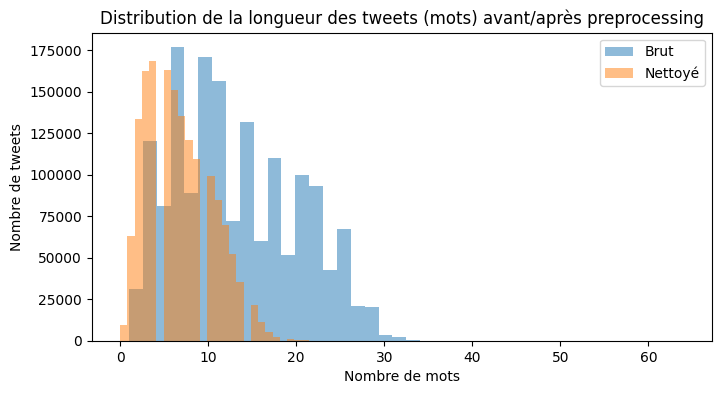

In [ ]:
plt.figure(figsize=(8, 4))
df["len_raw"].plot(kind="hist", bins=40, alpha=0.5, label="Brut")
df["len_simple"].plot(kind="hist", bins=40, alpha=0.5, label="Nettoyé")
plt.legend()
plt.title("Distribution de la longueur des tweets (mots) avant/après preprocessing")
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre de tweets")
plt.show()

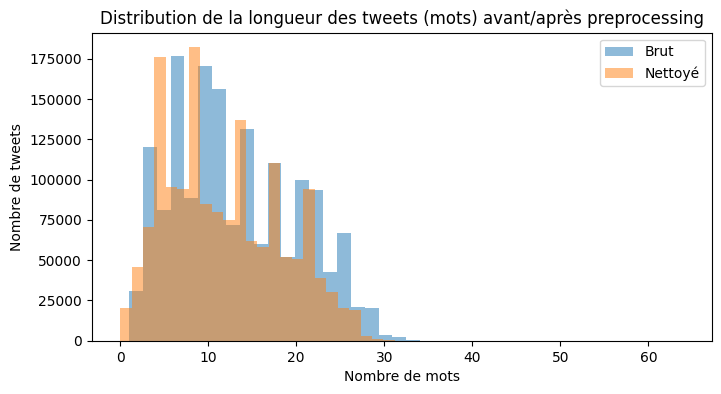

In [ ]:
plt.figure(figsize=(8, 4))
df["len_raw"].plot(kind="hist", bins=40, alpha=0.5, label="Brut")
df["len_adv"].plot(kind="hist", bins=40, alpha=0.5, label="Nettoyé")
plt.legend()
plt.title("Distribution de la longueur des tweets (mots) avant/après preprocessing")
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre de tweets")
plt.show()

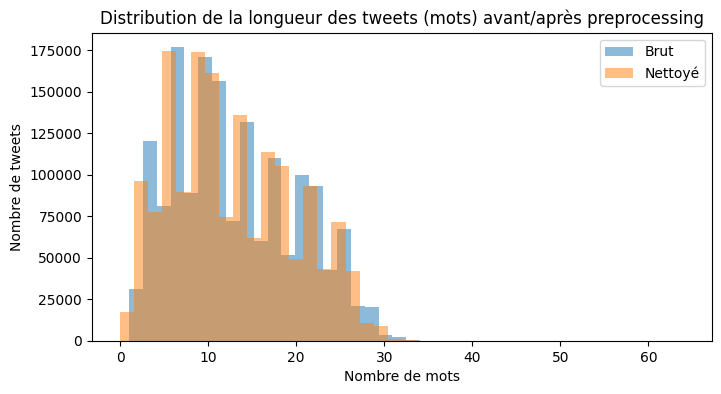

In [ ]:
plt.figure(figsize=(8, 4))
df["len_raw"].plot(kind="hist", bins=40, alpha=0.5, label="Brut")
df["len_bert"].plot(kind="hist", bins=40, alpha=0.5, label="Nettoyé")
plt.legend()
plt.title("Distribution de la longueur des tweets (mots) avant/après preprocessing")
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre de tweets")
plt.show()

---


In [17]:
df_base = df.copy()

df_simple = drop_short_texts(df_base, "text_simple", min_len=2)

df_adv = drop_short_texts(df_base, "text_adv", min_len=2)

df_bert = drop_short_texts(df_base, "text_bert", min_len=1)

[drop_short_texts] Colonne 'text_simple': 72684 lignes supprimées sur 1600000 (4.5427%). Min len = 2
[drop_short_texts] Colonne 'text_adv': 20370 lignes supprimées sur 1600000 (1.2731%). Min len = 2
[drop_short_texts] Colonne 'text_bert': 2815 lignes supprimées sur 1600000 (0.1759%). Min len = 1


In [ ]:
len(df_base), len(df_simple), len(df_adv), len(df_bert)

(1600000, 1527316, 1579630, 1597185)

In [ ]:
df_base[["text", "text_simple", "text_adv", "text_bert"]].sample(5, random_state=42)

,text,text_simple,text_adv,text_bert
541200,@chrishasboobs AHHH I HOPE YOUR OK!!!,ahhh hope,ahhh hope your ok,AHHH I HOPE YOUR OK!!!
750,"@misstoriblack cool , i have no tweet apps for my razr 2",cool tweet apps razr,cool have no tweet apps for my razr,"cool , i have no tweet apps for my razr 2"
766711,"@TiannaChaos i know just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u",know family drama lame hey next time hang kim guy like sleepover whatever ill call,know just family drama its lame hey next time hang out with kim guys like have sleepover or whatever ill call,"i know just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u"
285055,School email won't open and I have geography stuff on there to revise! *Stupid School* :'(,school email open geography stuff revise stupid school,school email won open and have geography stuff on there to revise stupid school,School email won't open and I have geography stuff on there to revise! *Stupid School* :'(
705995,upper airways problem,upper airway problem,upper airways problem,upper airways problem


In [ ]:
cols = ["len_raw", "len_simple", "len_adv", "len_bert"]
desc = df[cols].describe().T

for col in ["count", "min", "25%", "50%", "75%", "max"]:
    desc[col] = desc[col].astype(int)

desc["mean"] = desc["mean"].round(2)
desc["std"] = desc["std"].round(2)

desc

,count,mean,std,min,25%,50%,75%,max
len_raw,1600000,13.18,6.96,1,7,12,19,64
len_simple,1600000,6.69,3.74,0,4,6,9,33
len_adv,1600000,11.82,6.53,0,6,11,17,52
len_bert,1600000,12.65,6.96,0,7,12,18,64


In [ ]:
def resume_longueurs(df_base, df_simple, df_adv, df_bert):
    lignes = []

    desc_s = df_base["len_raw"].describe()
    lignes.append(
        {
            "dataset": "Base",
            "count": int(desc_s["count"]),
            "mean": round(desc_s["mean"], 2),
            "std": round(desc_s["std"], 2),
            "min": int(desc_s["min"]),
            "25%": int(desc_s["25%"]),
            "50%": int(desc_s["50%"]),
            "75%": int(desc_s["75%"]),
            "max": int(desc_s["max"]),
        }
    )

    desc_s = df_simple["len_simple"].describe()
    lignes.append(
        {
            "dataset": "Simple",
            "count": int(desc_s["count"]),
            "mean": round(desc_s["mean"], 2),
            "std": round(desc_s["std"], 2),
            "min": int(desc_s["min"]),
            "25%": int(desc_s["25%"]),
            "50%": int(desc_s["50%"]),
            "75%": int(desc_s["75%"]),
            "max": int(desc_s["max"]),
        }
    )

    desc_a = df_adv["len_adv"].describe()
    lignes.append(
        {
            "dataset": "Avancé",
            "count": int(desc_a["count"]),
            "mean": round(desc_a["mean"], 2),
            "std": round(desc_a["std"], 2),
            "min": int(desc_a["min"]),
            "25%": int(desc_a["25%"]),
            "50%": int(desc_a["50%"]),
            "75%": int(desc_a["75%"]),
            "max": int(desc_a["max"]),
        }
    )

    desc_b = df_bert["len_bert"].describe()
    lignes.append(
        {
            "dataset": "BERT",
            "count": int(desc_b["count"]),
            "mean": round(desc_b["mean"], 2),
            "std": round(desc_b["std"], 2),
            "min": int(desc_b["min"]),
            "25%": int(desc_b["25%"]),
            "50%": int(desc_b["50%"]),
            "75%": int(desc_b["75%"]),
            "max": int(desc_b["max"]),
        }
    )

    res = pd.DataFrame(lignes).set_index("dataset")
    return res


table_longueurs = resume_longueurs(df_base, df_simple, df_adv, df_bert)
table_longueurs

,count,mean,std,min,25%,50%,75%,max
dataset,,,,,,,,
Base,1600000,13.18,6.96,1,7,12,19,64
Simple,1527316,6.97,3.60,2,4,6,10,33
Avancé,1579630,11.96,6.45,2,7,11,17,52
BERT,1597185,12.67,6.94,1,7,12,18,64


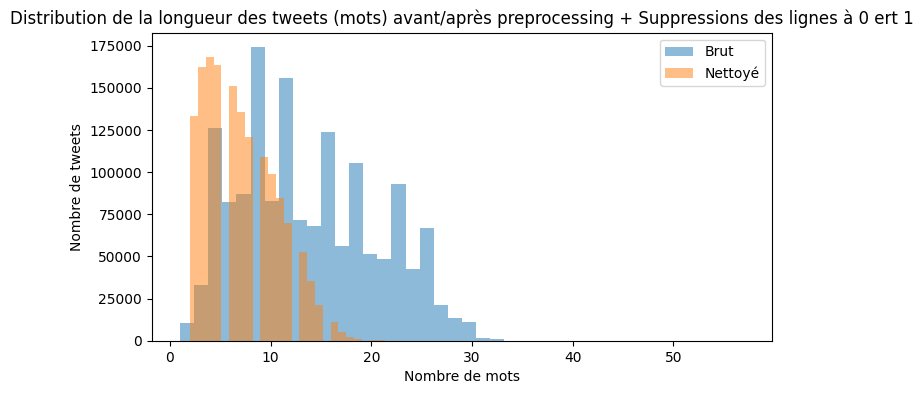

In [ ]:
plt.figure(figsize=(8, 4))
df_simple["len_raw"].plot(kind="hist", bins=40, alpha=0.5, label="Brut")
df_simple["len_simple"].plot(kind="hist", bins=40, alpha=0.5, label="Nettoyé")
plt.legend()
plt.title(
    "Distribution de la longueur des tweets (mots) avant/après preprocessing + Suppressions des lignes à 0 ert 1"
)
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre de tweets")
plt.show()

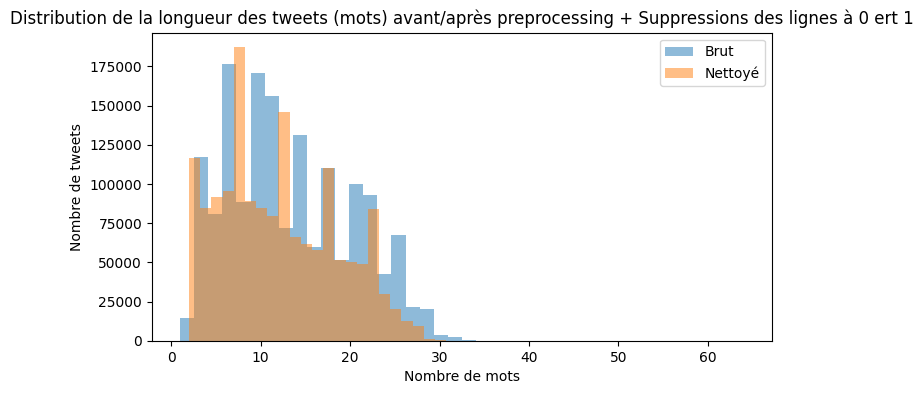

In [ ]:
plt.figure(figsize=(8, 4))
df_adv["len_raw"].plot(kind="hist", bins=40, alpha=0.5, label="Brut")
df_adv["len_adv"].plot(kind="hist", bins=40, alpha=0.5, label="Nettoyé")
plt.legend()
plt.title(
    "Distribution de la longueur des tweets (mots) avant/après preprocessing + Suppressions des lignes à 0 ert 1"
)
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre de tweets")
plt.show()

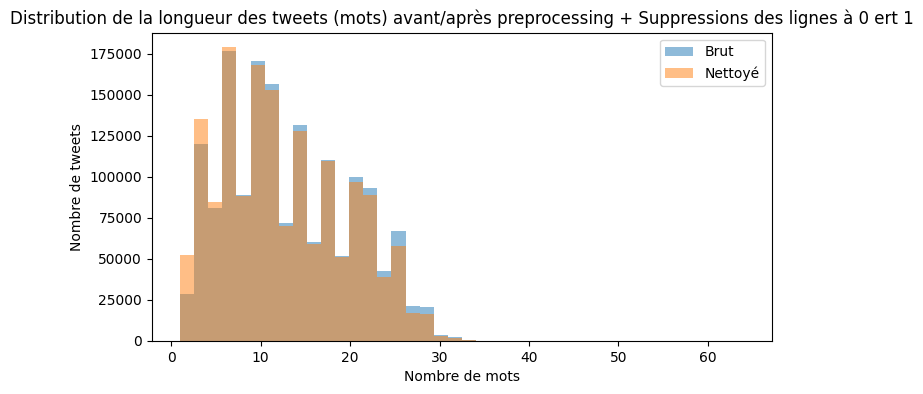

In [ ]:
plt.figure(figsize=(8, 4))
df_bert["len_raw"].plot(kind="hist", bins=40, alpha=0.5, label="Brut")
df_bert["len_bert"].plot(kind="hist", bins=40, alpha=0.5, label="Nettoyé")
plt.legend()
plt.title(
    "Distribution de la longueur des tweets (mots) avant/après preprocessing + Suppressions des lignes à 0 ert 1"
)
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre de tweets")
plt.show()